In [1]:
# Stack
class Stack:
    def __init__(self):
        self.l = []
        
    def push(self, val):
        self.l.append(val)
        
    def pop(self):
        return self.l.pop()

    def peek(self):
        return self.l[-1]

    def __str__(self):
        s = [str(i) for i in self.l[-1::-1]]
        s = '\n'.join(s) + '\n'
        return s

In [2]:
s = Stack()

s.push(1)
s.push(2)
s.push(3)
s.push(4)

print(s)

s.pop()
s.pop()

print(s)

4
3
2
1

2
1



In [9]:
# Queue
class Queue:
    def __init__(self):
        self.size = 5
        self.list = [None for i in range(self.size)]
        self._in = 0
        self._out = 0
        self.is_empty = True
        self.is_full = False
        
    def _inc(self, index):
        if index+1 == self.size:
            return 0
        else:
            return index + 1
        
    def enqueue(self, value):
        if self.is_full == True:
            raise Exception("Queue is full")
            
        self.list[self._in] = value
        self._in = self._inc(self._in)
        
        self.is_empty = False
        if self._in == self._out:
            self.is_full = True
            
    def dequeue(self):
        if self.is_empty:
            raise IndexError("Queue is empty")
            
        self.list[self._out] = None
        self._out = self._inc(self._out)
        
        is_full = False     
        if self._out == self._in:
            self.is_empty = True
                    
    def __str__(self):
        queue = '[' + ' '.join([str(i) for i in self.list]) + ']'
        return queue

In [10]:
q = Queue()
print(q)

q.enqueue(5)
q.enqueue(6)
q.enqueue(7)
print(q)

q.dequeue()
q.dequeue()
print(q)

[None None None None None]
[5 6 7 None None]
[None None 7 None None]


In [4]:
# BST
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None:
        return "Nothing in the tree!"
    def add_nodes_edges(tree, dot=None):
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.value))
            
        for child in [tree.left, tree.right]:
            if child is not None:
                if child == tree.left:
                    dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right:
                    dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.value))    
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot)
        return dot
    
    dot = add_nodes_edges(tree)
    
    display(dot)

In [5]:
class TreeNode:
    def __init__(self, x):
        self.value = x
        self.left = None
        self.right = None


class BST(TreeNode):
    def __init__(self, value, parent=None):
        super().__init__(value)
        self.parent = parent
        
    def insert(self, val):
        if val < self.value:   #for left side
            if self.left is None:
                self.left = BST(val, self)
            else:
                self.left.insert(val)
        
        else:
            if self.right is None:
                self.right = BST(val, self)
            else:
                self.right.insert(val)

    def _find_one_child(self):
        if self.left is not None  and  self.right is None:
            return self.left
        elif self.right is not None and self.left is None:
            return self.right
        elif self.left is not None and self.right is not None:
            return "Both childs"
        else:
            return None
    
    def find_min(self):
        if self.left:
            return self.left.find_min()
            
        else:
            return self        
            
    def delete(self, val_to_delete):
        #if greater then root
        if val_to_delete > self.value:
            if self.right.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.right.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.right.right.find_min()
                    self.right.delete(min_node.value)
                    self.right.value = min_node.value
                    
                
                else:
                    self.right = None  #case 1
            
            else:
                self.right.delete(val_to_delete)
                
        #if less then root
        elif val_to_delete < self.value:
            if self.left.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.left.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.left.right.find_min()
                    self.left.delete(min_node.value)
                    self.left.value = min_node.value
                
                else:
                    self.left = None #case 1
            
            else:
                self.left.delete(val_to_delete)
                
        
        elif val_to_delete == self.value:
            one_child = self.right._find_one_child()
            if one_child != "Both childs" and one_child != None: #case 2
                self.value = one_child.value
                if one_child == one_child.parent.left:
                    one_child.parent.left = None
                else:
                    one_child.parent.right = None
                        
            elif one_child == "Both childs":#case 3
                min_node = self.right.find_min()
                self.delete(min_node.value)
                self.value = min_node.value
                                

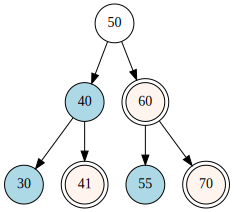

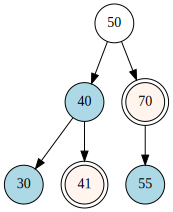

In [6]:
b1 = BST(50)
b1.insert(40)
b1.insert(60)
b1.insert(30)
b1.insert(41)
b1.insert(55)
b1.insert(70)

visualize_tree(b1)
b1.delete(60)
visualize_tree(b1)

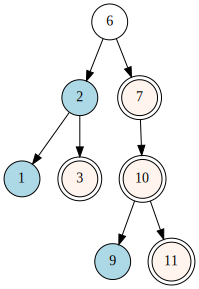

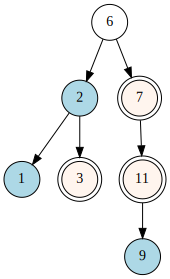

In [8]:
b2 = BST(6)
b2.insert(2)
b2.insert(7)
b2.insert(1)
b2.insert(3)
b2.insert(10)
b2.insert(9)
b2.insert(11)

visualize_tree(b2)
b2.delete(10)
visualize_tree(b2)

In [17]:
# Graph
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [22]:
def draw_graph_with_nx(G):
    pos = nx.spring_layout(G, iterations=200)
    options = {'node_color':'pink', 'alpha':1, 'node_size':2000, 'width':0.002, 'font_color':'darkred', 
               'font_size':25, 'arrows':True, 'edge_color':'brown', 
               'arrowstyle':'Fancy, head_length=1, head_width=1, tail_width=.4'
              }
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, **options)
    plt.show()

In [23]:
class DiGraph:
    def __init__(self):
        self.g = {}
    
    def add_node(self, node):
        if node in self.g:
            raise ValueError("Node already in graph")
        
        self.g[node] = []
        
    def add_edge(self, src, dest):
        if src not in self.g:
            raise ValueError("Source node not in graph")
        
        if dest not in self.g:
            raise ValueError("Destination node not in graph")
            
        src_edges = self.g[src]
        if dest in src_edges:
            return
        
        src_edges.append(dest)
        
    def draw_graph(self):
        G = nx.DiGraph()
        
        for src in self.g:
            G.add_node(src, label=src)
            for dest in self.g[src]:
                G.add_edge(src, dest)
                
        draw_graph_with_nx(G)        
        

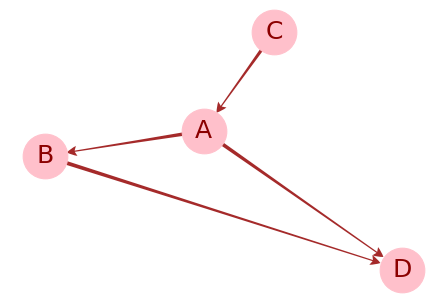

In [25]:
g = DiGraph()

g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_node('D')

g.add_edge('A', 'D')
g.add_edge('A', 'B')
g.add_edge('B', 'D')
g.add_edge('C', 'A')

g.draw_graph()